In [1]:
import numpy as np

np.__version__



'1.19.1'

In [2]:
def AND(x1, x2) :
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    
    tmp = np.sum(w*x) + b
    if tmp <=0 :
        return 0
    else :
        return 1
    
    
print(AND(1, 1))
print(AND(1, 0))
print(AND(0, 1))
print(AND(0, 0))

1
0
0
0


In [3]:
def NAND(x1, x2) :
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    
    tmp = np.sum(w*x) + b
    if tmp <=0 :
        return 0
    else :
        return 1
    
print(NAND(1, 1))
print(NAND(1, 0))
print(NAND(0, 1))
print(NAND(0, 0))

0
1
1
1


In [4]:
def OR(x1, x2) :
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else :
        return 1
print(OR(1, 1))
print(OR(1, 0))
print(OR(0, 1))
print(OR(0, 0))

1
1
1
0


In [5]:
def XOR(x1, x2) :
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y
    
print(XOR(1, 1))
print(XOR(1, 0))
print(XOR(0, 1))
print(XOR(0, 0))


0
1
1
0


In [6]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


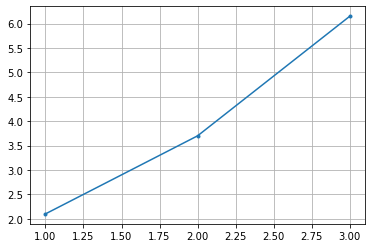

In [28]:

x_train = [1, 2, 3]

y_train = [2+0.1, 4-0.3, 6+0.15] # 약간의 noise 추가


plt.plot(x_train, y_train, '.-')
plt.grid()




In [31]:
signal_length = len(x_train)

y_noise = np.random.normal(0, 1, signal_length)
y_noise


array([-0.03924136, -0.37830125, -0.48185369])

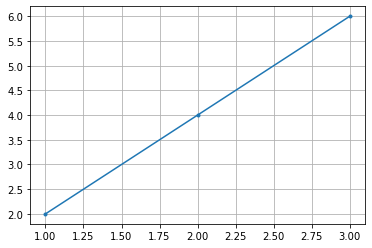

In [32]:
y_train = np.multiply(x_train, 2)
plt.plot(x_train, y_train, '.-')
plt.grid()



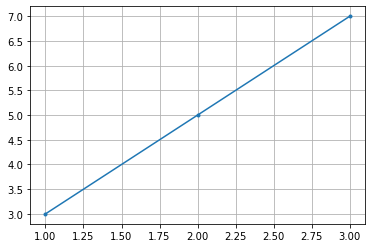

In [33]:
y_train = [3, 5, 7]
plt.plot(x_train, y_train, '.-')
plt.grid()


In [34]:
y_train = y_train + y_noise
y_train


array([2.96075864, 4.62169875, 6.51814631])

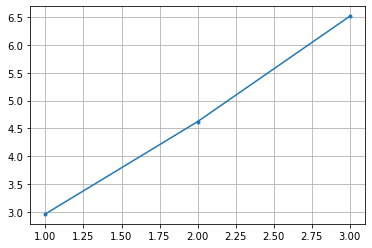

In [35]:
plt.plot(x_train, y_train, '.-')
plt.grid()


In [8]:
# x_train = np.arange(1.0, 5.0, 0.1)
# y_train = np.log(x_train)
# b = np.random.randn()

# y_train = y_train+b


x_train = [1, 2, 3]

y_train = [2+0.1, 4-0.3, 6+0.15] # 약간의 noise 추가

y_train



[2.1, 3.7, 6.15]

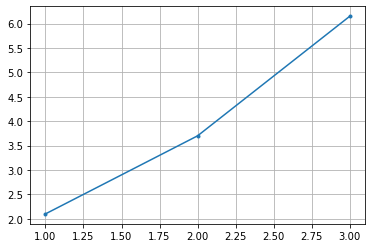

In [9]:
plt.plot(x_train, y_train, '.-')
plt.grid()

In [10]:
w0 = 7.0
b0 = 5.0

w0 = tf.Variable(tf.random_normal([1]), name = 'weight')
b0 = tf.Variable(tf.random_normal([1]), name = 'bias')



In [11]:
hypothesis = x_train * w0 + b0
hypothesis


<tf.Tensor 'add:0' shape=(3,) dtype=float32>

In [12]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))
loss


<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [13]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(loss)
train


<tf.Operation 'GradientDescent' type=NoOp>

In [14]:
sess = tf.Session()
sess


In [15]:
sess.run(tf.global_variables_initializer())


In [16]:
nb_epoch = 10001
vloss = []
vb = []
vw = []

for step in range(nb_epoch) :
    sess.run(train)
    
    if step % 200 == 0 :
        w1 = sess.run(w0)[0]
        b1 = sess.run(b0)[0]
        loss1 = sess.run(loss)
        vb.append(b1)
        vw.append(w1)
        
        
        vloss.append(loss1)
        print(step, '\t', loss1, w1, b1)
        
        

0 	 3.590606 0.9625939 0.3854245
200 	 0.07264832 1.8155887 0.4093745
400 	 0.05255257 1.8955965 0.22749785
600 	 0.044879053 1.9450366 0.115108944
800 	 0.04194894 1.9755876 0.045659423
1000 	 0.040830072 1.9944662 0.0027439208
1200 	 0.04040276 2.0061321 -0.023775233
1400 	 0.040239673 2.0133407 -0.040162455
1600 	 0.040177386 2.0177953 -0.05028866
1800 	 0.040153634 2.0205476 -0.056545608
2000 	 0.040144462 2.0222483 -0.060411576
2200 	 0.040141024 2.0232985 -0.06279975
2400 	 0.04013969 2.023948 -0.064274885
2600 	 0.040139228 2.024349 -0.06518662
2800 	 0.040139012 2.024596 -0.06575001
3000 	 0.04013895 2.0247505 -0.06609917
3200 	 0.0401389 2.0248456 -0.06631514
3400 	 0.040138856 2.0249023 -0.066445984
3600 	 0.04013888 2.0249414 -0.06653266
3800 	 0.04013894 2.0249631 -0.06658347
4000 	 0.040138867 2.0249755 -0.066612415
4200 	 0.040138856 2.0249827 -0.0666289
4400 	 0.040138904 2.0249867 -0.06663825
4600 	 0.040138926 2.024989 -0.06664352
4800 	 0.04013887 2.02499 -0.06664646


Text(0, 0.5, 'loss')

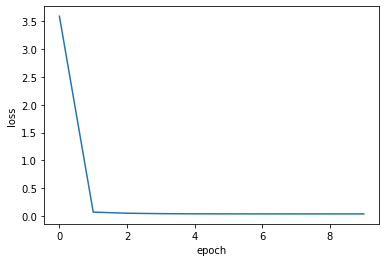

In [17]:
plt.plot(vloss[:10])
plt.xlabel("epoch")
plt.ylabel("loss")

In [49]:
nb_epoch/200



50.005

Text(0, 0.5, 'weight')

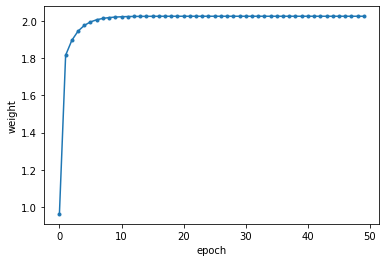

In [59]:
plt.plot(vw[:50], '.-')      #TODO 
plt.xlabel("epoch")
plt.ylabel("weight")




Text(0, 0.5, 'weight')

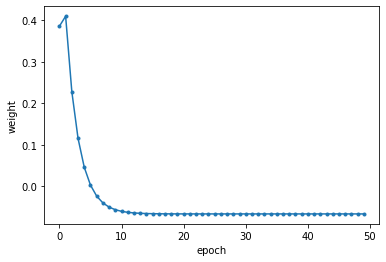

In [56]:
plt.plot(vb[:50], '.-')       #TODO
plt.xlabel("epoch")
plt.ylabel("weight")


In [50]:
print(np.shape(vw))
print(np.shape(vb))



(51,)
(51,)


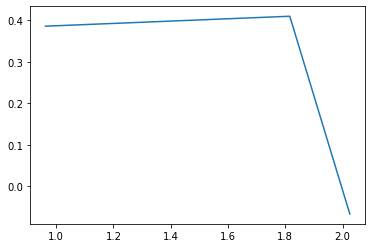

In [18]:
plt.plot(vw, vb)


In [19]:
w1 = sess.run(w0)[0]
b1 = sess.run(b0)[0]
print(w1, b1)


2.0249908 -0.06664799


In [20]:
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)


y = 2.0249908x + -0.06664799


Text(0.5, 1.0, 'y = 2.0249908x + -0.06664799')

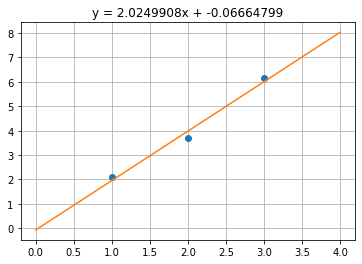

In [21]:
plt.figure(figsize = (6, 4))
plt.plot(x_train, y_train, "o")

x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1 
plt.plot(x1, y1)
plt.grid()

plt.title(str1)



Text(0.5, 1.0, 'y = 2.0249908x + -0.06664799')

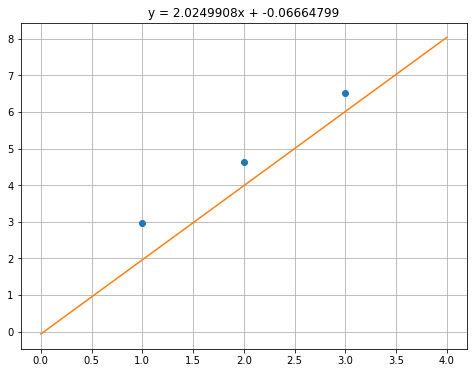

In [60]:
plt.figure(figsize = (8, 6))          #change figsize
plt.plot(x_train, y_train, "o")

x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1 
plt.plot(x1, y1)
plt.grid()

plt.title(str1)


In [66]:
x_train = np.arange(-5.0, 5.0, 0.1)
y_train = np.sin(x_train)
signal_length = len(x_train)

y_noise = np.random.normal(0, 0.1, signal_length)
np.shape(y_noise)




(100,)

Text(0, 0.5, 'y_train')

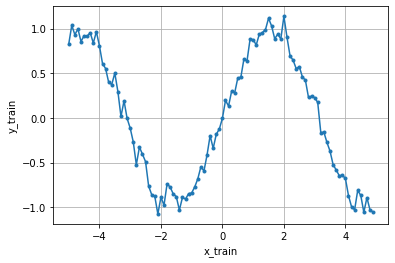

In [67]:
y_train = y_train + y_noise
plt.plot(x_train, y_train, '.-')
plt.grid()
plt.xlabel("x_train")
plt.ylabel("y_train")


In [85]:
w0_train = 1.0
b0_train = 0.01

w_train = tf.Variable(w0_train*tf.ones([1]), name = "weight")
b_train = tf.Variable(b0_train*tf.ones([1]), name = "bias")

hypothesis = x_train*w_train + b_train

loss = tf.reduce_mean(tf.square(hypothesis - y_train))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())




In [86]:
nb_epoch_sin = 10000
vloss_sin = []
vb_sin = []
vw_sin = []

for step in range(nb_epoch) :
    sess.run(train)
    loss1 = sess.run(loss)
    vloss_sin.append(loss1)
    
    if step % 200 == 0 :
        w_sin = sess.run(w_train)[0]
        b_sin = sess.run(b_train)[0]
        
        print(step, "\t", loss1, "\t", w_sin, "\t", b_sin)
        

0 	 4.6350145 	 -0.76322496 	 0.019677486
200 	 0.4855317 	 -0.05775046 	 0.0054999427
400 	 0.4855317 	 -0.057750452 	 0.0054999436
600 	 0.4855317 	 -0.057750452 	 0.0054999418
800 	 0.4855317 	 -0.05775046 	 0.005499943
1000 	 0.4855317 	 -0.05775045 	 0.0054999427
1200 	 0.4855317 	 -0.057750452 	 0.005499942
1400 	 0.4855317 	 -0.05775046 	 0.0054999436
1600 	 0.4855317 	 -0.05775046 	 0.0054999418
1800 	 0.4855317 	 -0.057750452 	 0.0054999427
2000 	 0.4855317 	 -0.05775046 	 0.005499944
2200 	 0.4855317 	 -0.05775046 	 0.005499942
2400 	 0.4855317 	 -0.057750452 	 0.005499943
2600 	 0.4855317 	 -0.057750456 	 0.0054999427
2800 	 0.4855317 	 -0.05775046 	 0.0054999427
3000 	 0.4855317 	 -0.057750452 	 0.0054999436
3200 	 0.4855317 	 -0.057750452 	 0.0054999418
3400 	 0.4855317 	 -0.05775046 	 0.005499943
3600 	 0.4855317 	 -0.05775045 	 0.0054999427
3800 	 0.4855317 	 -0.057750452 	 0.005499942
4000 	 0.4855317 	 -0.05775046 	 0.0054999436
4200 	 0.4855317 	 -0.05775046 	 0.00549

Text(0, 0.5, 'loss')

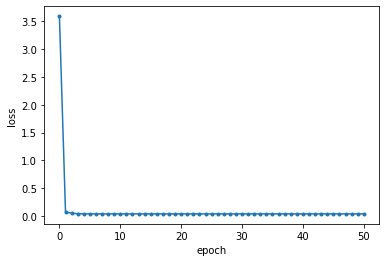

In [87]:
plt.plot(vloss[:100], '.-')
plt.xlabel("epoch")
plt.ylabel("loss")
#not learning

In [88]:
w2 = sess.run(w_train)
b2 = sess.run(b_train)
print(w2, b2)


[-0.05775046] [0.00549994]
